# Spam Email Classifiaction Using Machine Learning Techniques

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### 2. Load Dataset 

We first load the dataset which is from Kaggle.

In [2]:
data = pd.read_csv(r"spam_ham_dataset.csv")
# data = pd.read_csv('spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#### About the Dataset
The csv file contains 5172 rows, each row for each email. There are 4 columns. The second column indicates the label. It indicate whether the Email is spam or not. The spam message is indicated using “spam” and the  message which is not spam is indicated by “ham”.  The third column indicate the body of the Email. It contain the text of the Message. The fourth column indicate the spam m and the ham message using 0 and 1. The spam message indicate using 1 and the ham message indicted using 0.  

In [3]:
data['text'] = data['text'].str.replace('\d+', '')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=20)
X = vectorizer.fit_transform(data['text'])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
vectorizer.get_feature_names()

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ability',
 'able',
 'about',
 'above',
 'absence',
 'absolutely',
 'ac',
 'accept',
 'acceptance',
 'accepted',
 'access',
 'accomplish',
 'according',
 'accordingly',
 'account',
 'accountant',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'achieve',
 'acquire',
 'acquisition',
 'across',
 'act',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'acton',
 'acts',
 'actual',
 'actually',
 'actuals',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addressed',
 'addresses',
 'adjust',
 'adjusted',
 'adjustment',
 'adjustments',
 'administration',
 'adobe',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'advertisement',
 'advice',
 'advise',
 'advised',
 'advises',
 'advisor',
 'aeor',
 'aep',
 'affect',
 'affected',
 'affiliate',
 'affiliated',
 'affordable',
 'africa',
 'after',
 'afternoon',
 'again',
 'against',
 'age',
 'agency',
 'agent',
 'aggressive',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agreements',

#### Visualize the distribution of the dataset 

As Seen from the Dataset there is a small imbalance between the positive and the negative class. But before we treat it the imbalance, we first test it on a base model

### 3. Train Test Split

In [6]:
y = data["label_num"]
# X = data2.drop(["label","label_num"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X.toarray(),y,test_size=0.1,random_state=42)

In [7]:
X_train.shape

(4653, 2771)

In [8]:
X_test.shape

(518, 2771)

In [9]:
print("train distribution:")
print( y_train.value_counts())
print()
print("test distribution:" )
print(y_test.value_counts())

train distribution:
0    3301
1    1352
Name: label_num, dtype: int64

test distribution:
0    371
1    147
Name: label_num, dtype: int64


### 4. Imbalance Treatment

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [11]:
y_res.value_counts()

1    3301
0    3301
Name: label_num, dtype: int64

In [12]:
X_train,X_val,y_train,y_val = train_test_split(X_res,y_res,test_size=0.1,random_state=42)

In [13]:
y_val.value_counts()

0    338
1    323
Name: label_num, dtype: int64

### 5. Machine Learning Models

In [14]:
def fit_model(x_tr,y_tr):
    models = []
    
    # Naive Bayes model
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    models.append(('GaussianNB Classifier', gnb))
    
    # multinominal nave bayes model
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    models.append(('MultinomialNB Classifier', mnb))
    
    #bernoulie nave bayes model
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    models.append(('BernoulliNB Classifier', bnb))

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    RandomForest_model = RandomForestClassifier(n_estimators=250,
                                                max_depth=12,
                                                min_samples_leaf=16)
    RandomForest_model.fit(x_tr,y_tr)
    models.append(('RandomForest Classifier', RandomForest_model))

    # Logestic Regression
    from sklearn.linear_model import LogisticRegression
    log_model = LogisticRegression()
    log_model.fit(x_tr,y_tr)
    models.append(('LogisticRegression', log_model))

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)
    decision_model.fit(x_tr,y_tr)
    models.append(('Decision Tree Classifier', decision_model))

    # SVM
    from sklearn.svm import SVC
    svc_model = SVC()
    svc_model.fit(x_tr, y_tr)
    models.append(('SVM Classifier', svc_model))

    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn_model = KNeighborsClassifier(n_neighbors = 7)
    knn_model.fit(x_tr, y_tr)
    models.append(('KNeighborsClassifier', knn_model))

    # XGBoost
    from xgboost import XGBClassifier
    XGB_model = XGBClassifier(use_label_encoder=False)
    XGB_model.fit(x_tr, y_tr)
    models.append(('XGBoost', XGB_model))

    # voting classifier
    from sklearn.ensemble import VotingClassifier
    combined_model = [
                      ('Decision Tree Classifier', decision_model), 

                      ('KNeighborsClassifier', knn_model), 

                      ('LogisticRegression', log_model),

                      ('XGBoost', XGB_model)

                     ]
    VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
    VotingClassifier.fit(x_tr, y_tr)
    models.append(('VotingClassifier', VotingClassifier))
    

    return models



In [15]:
# model evaluations
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_roc_curve
from sklearn import metrics

def eval_model(models,x,y):

    for i, v in models:

    #     scores = cross_val_score(v, x, y, cv=10)

        accuracy = metrics.accuracy_score(y, v.predict(x))

        confusion = confusion_matrix(y, v.predict(x))

        classification = classification_report(y, v.predict(x),zero_division= 0)

        print()

        print('=============================={}  Model Evaluation =============================='.format(i))

        print("Confusion matrix:" "\n", confusion)

        print()
        
        print("Accuracy:" "\n", accuracy)

        print()

        print("Classification report:" "\n", classification) 

        print()

        plot_roc_curve(v,x,y)


#### Train the Model

In [16]:
model = fit_model(X_train,y_train)

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[08:39:53] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Evaluate the Models

Evaluation on the training set

==============================GaussianNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2868   95]
 [  10 2968]]

Accuracy:
 0.9823262077091399

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2963
           1       0.97      1.00      0.98      2978

    accuracy                           0.98      5941
   macro avg       0.98      0.98      0.98      5941
weighted avg       0.98      0.98      0.98      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================MultinomialNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2833  130]
 [ 398 2580]]

Accuracy:
 0.9111260730516748

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      2963
           1       0.95      0.87      0.91      2978

    accuracy                           0.91      5941
   macro avg       0.91      0.91      0.91      5941
weighted avg       0.91      0.91      0.91      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================BernoulliNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2763  200]
 [   9 2969]]

Accuracy:
 0.9648207372496213

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      2963
           1       0.94      1.00      0.97      2978

    accuracy                           0.96      5941
   macro avg       0.97      0.96      0.96      5941
weighted avg       0.97      0.96      0.96      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2666  297]
 [   6 2972]]

Accuracy:
 0.9489984851035179

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      2963
           1       0.91      1.00      0.95      2978

    accuracy                           0.95      5941
   macro avg       0.95      0.95      0.95      5941
weighted avg       0.95      0.95      0.95      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[2941   22]
 [   0 2978]]

Accuracy:
 0.9962969197104864

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2963
           1       0.99      1.00      1.00      2978

    accuracy                           1.00      5941
   macro avg       1.00      1.00      1.00      5941
weighted avg       1.00      1.00      1.00      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================Decision Tree Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2726  237]
 [  38 2940]]

Accuracy:
 0.9537114963810807

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2963
           1       0.93      0.99      0.96      2978

    accuracy                           0.95      5941
   macro avg       0.96      0.95      0.95      5941
weighted avg       0.96      0.95      0.95      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================SVM Classifier  Model Evaluation ==============================
Confusion matrix:
 [[2729  234]
 [   1 2977]]

Accuracy:
 0.9604443696347417

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      2963
           1       0.93      1.00      0.96      2978

    accuracy                           0.96      5941
   macro avg       0.96      0.96      0.96      5941
weighted avg       0.96      0.96      0.96      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================KNeighborsClassifier  Model Evaluation ==============================
Confusion matrix:
 [[1908 1055]
 [   1 2977]]

Accuracy:
 0.8222521461033496

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78      2963
           1       0.74      1.00      0.85      2978

    accuracy                           0.82      5941
   macro avg       0.87      0.82      0.82      5941
weighted avg       0.87      0.82      0.82      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================XGBoost  Model Evaluation ==============================
Confusion matrix:
 [[2937   26]
 [   0 2978]]

Accuracy:
 0.9956236323851203

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2963
           1       0.99      1.00      1.00      2978

    accuracy                           1.00      5941
   macro avg       1.00      1.00      1.00      5941
weighted avg       1.00      1.00      1.00      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================VotingClassifier  Model Evaluation ==============================
Confusion matrix:
 [[2877   86]
 [   0 2978]]

Accuracy:
 0.9855243225046288

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      2963
           1       0.97      1.00      0.99      2978

    accuracy                           0.99      5941
   macro avg       0.99      0.99      0.99      5941
weighted avg       0.99      0.99      0.99      5941




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


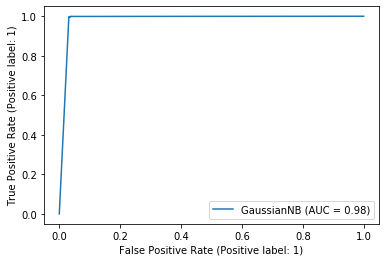

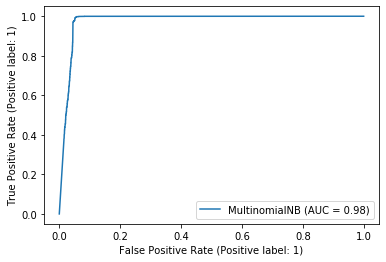

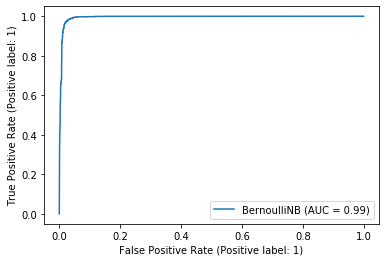

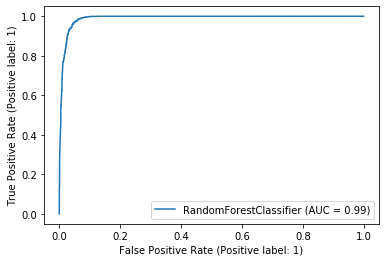

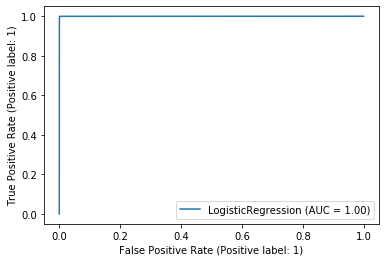

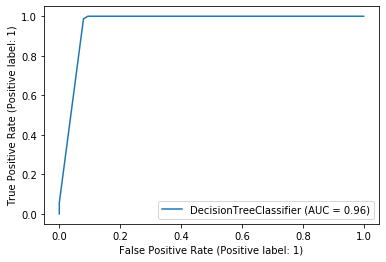

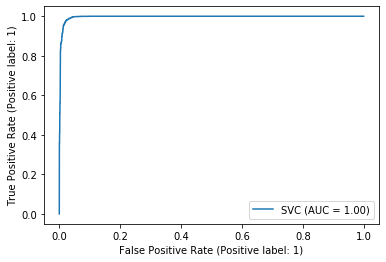

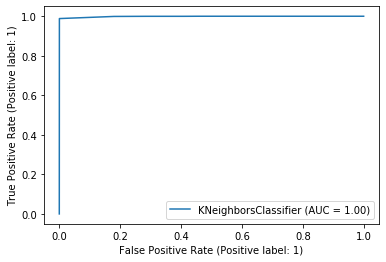

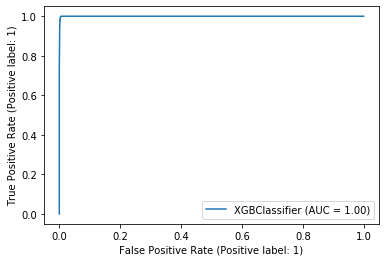

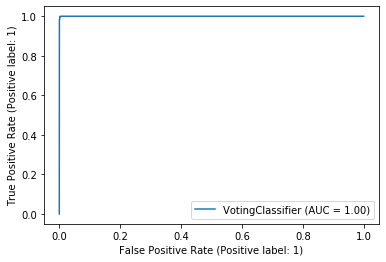

In [17]:
print("Evaluation on the training set")
eval_model(model,X_train,y_train)

Evaluation on the training set

==============================GaussianNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[322  16]
 [  5 318]]

Accuracy:
 0.9682299546142209

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       338
           1       0.95      0.98      0.97       323

    accuracy                           0.97       661
   macro avg       0.97      0.97      0.97       661
weighted avg       0.97      0.97      0.97       661



==============================MultinomialNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[314  24]
 [ 51 272]]

Accuracy:
 0.886535552193646

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       338
           1       0.92      0.84      0.88       323

    accuracy                           0.89       661
   macro avg       0.

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisp


==============================BernoulliNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[311  27]
 [  2 321]]

Accuracy:
 0.9561270801815431

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       338
           1       0.92      0.99      0.96       323

    accuracy                           0.96       661
   macro avg       0.96      0.96      0.96       661
weighted avg       0.96      0.96      0.96       661



==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[295  43]
 [  2 321]]

Accuracy:
 0.9319213313161876

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       338
           1       0.88      0.99      0.93       323

    accuracy                           0.93       661
   macro avg       0.94      0.93      0.93       6

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisp


==============================SVM Classifier  Model Evaluation ==============================
Confusion matrix:
 [[300  38]
 [  5 318]]

Accuracy:
 0.9349470499243571

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       338
           1       0.89      0.98      0.94       323

    accuracy                           0.93       661
   macro avg       0.94      0.94      0.93       661
weighted avg       0.94      0.93      0.93       661




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================KNeighborsClassifier  Model Evaluation ==============================
Confusion matrix:
 [[197 141]
 [  0 323]]

Accuracy:
 0.7866868381240545

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74       338
           1       0.70      1.00      0.82       323

    accuracy                           0.79       661
   macro avg       0.85      0.79      0.78       661
weighted avg       0.85      0.79      0.78       661




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================XGBoost  Model Evaluation ==============================
Confusion matrix:
 [[320  18]
 [  2 321]]

Accuracy:
 0.9697428139183056

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       338
           1       0.95      0.99      0.97       323

    accuracy                           0.97       661
   macro avg       0.97      0.97      0.97       661
weighted avg       0.97      0.97      0.97       661




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================VotingClassifier  Model Evaluation ==============================
Confusion matrix:
 [[316  22]
 [  1 322]]

Accuracy:
 0.9652042360060514

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       338
           1       0.94      1.00      0.97       323

    accuracy                           0.97       661
   macro avg       0.97      0.97      0.97       661
weighted avg       0.97      0.97      0.97       661




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


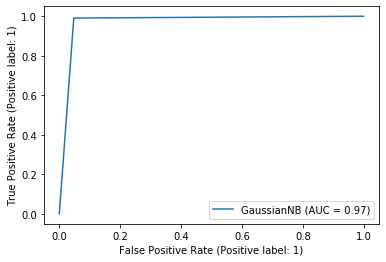

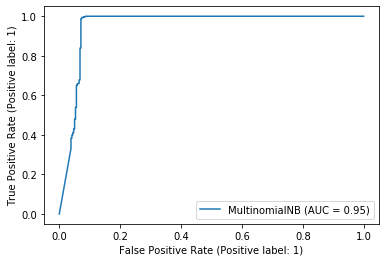

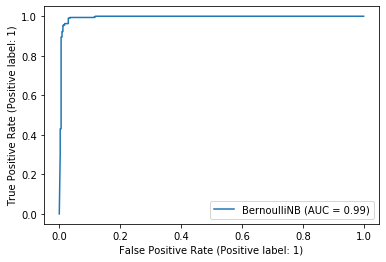

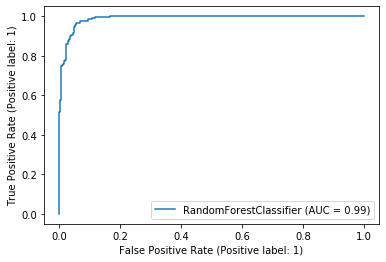

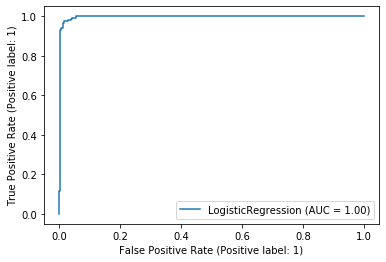

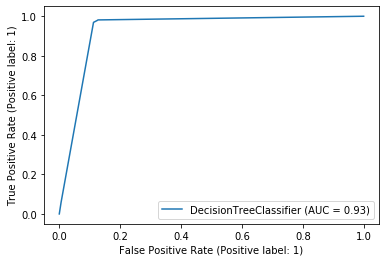

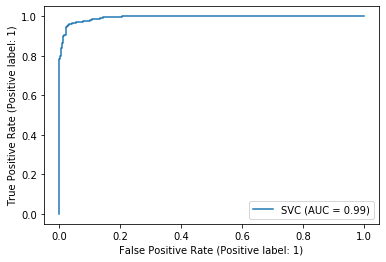

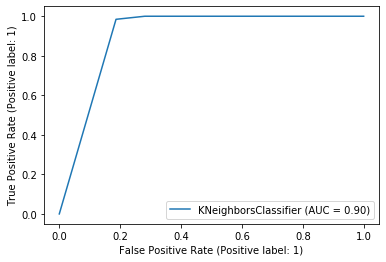

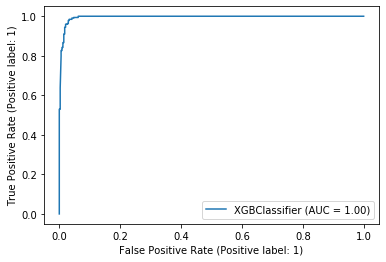

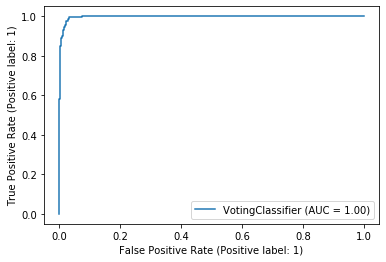

In [18]:
print("Evaluation on the training set")
eval_model(model,X_val,y_val)

Evaluation on the Test set

==============================GaussianNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[356  15]
 [  3 144]]

Accuracy:
 0.9652509652509652

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       371
           1       0.91      0.98      0.94       147

    accuracy                           0.97       518
   macro avg       0.95      0.97      0.96       518
weighted avg       0.97      0.97      0.97       518



==============================MultinomialNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[358  13]
 [  9 138]]

Accuracy:
 0.9575289575289575

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       371
           1       0.91      0.94      0.93       147

    accuracy                           0.96       518
   macro avg       0.94 

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisp


==============================BernoulliNB Classifier  Model Evaluation ==============================
Confusion matrix:
 [[344  27]
 [  2 145]]

Accuracy:
 0.944015444015444

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       371
           1       0.84      0.99      0.91       147

    accuracy                           0.94       518
   macro avg       0.92      0.96      0.93       518
weighted avg       0.95      0.94      0.95       518



==============================RandomForest Classifier  Model Evaluation ==============================
Confusion matrix:
 [[328  43]
 [  1 146]]

Accuracy:
 0.915057915057915

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       371
           1       0.77      0.99      0.87       147

    accuracy                           0.92       518
   macro avg       0.88      0.94      0.90       518

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================LogisticRegression  Model Evaluation ==============================
Confusion matrix:
 [[358  13]
 [  4 143]]

Accuracy:
 0.9671814671814671

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       371
           1       0.92      0.97      0.94       147

    accuracy                           0.97       518
   macro avg       0.95      0.97      0.96       518
weighted avg       0.97      0.97      0.97       518



==============================Decision Tree Classifier  Model Evaluation ==============================
Confusion matrix:
 [[342  29]
 [  7 140]]

Accuracy:
 0.9305019305019305

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       371
           1       0.83      0.95      0.89       147

    accuracy                           0.93       518
   macro avg       0.90      0.94      0.92       518


/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================SVM Classifier  Model Evaluation ==============================
Confusion matrix:
 [[332  39]
 [  3 144]]

Accuracy:
 0.918918918918919

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       371
           1       0.79      0.98      0.87       147

    accuracy                           0.92       518
   macro avg       0.89      0.94      0.91       518
weighted avg       0.93      0.92      0.92       518




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================KNeighborsClassifier  Model Evaluation ==============================
Confusion matrix:
 [[239 132]
 [  0 147]]

Accuracy:
 0.7451737451737451

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78       371
           1       0.53      1.00      0.69       147

    accuracy                           0.75       518
   macro avg       0.76      0.82      0.74       518
weighted avg       0.87      0.75      0.76       518




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================XGBoost  Model Evaluation ==============================
Confusion matrix:
 [[357  14]
 [  3 144]]

Accuracy:
 0.9671814671814671

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       371
           1       0.91      0.98      0.94       147

    accuracy                           0.97       518
   macro avg       0.95      0.97      0.96       518
weighted avg       0.97      0.97      0.97       518




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



==============================VotingClassifier  Model Evaluation ==============================
Confusion matrix:
 [[345  26]
 [  1 146]]

Accuracy:
 0.9478764478764479

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       371
           1       0.85      0.99      0.92       147

    accuracy                           0.95       518
   macro avg       0.92      0.96      0.94       518
weighted avg       0.96      0.95      0.95       518




/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


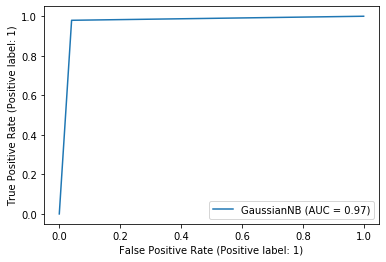

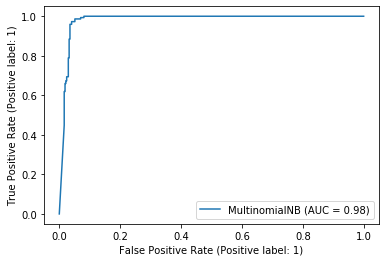

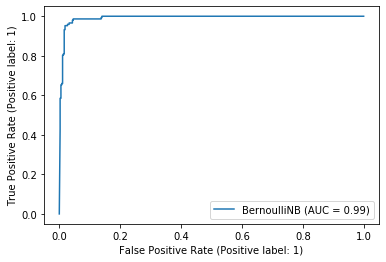

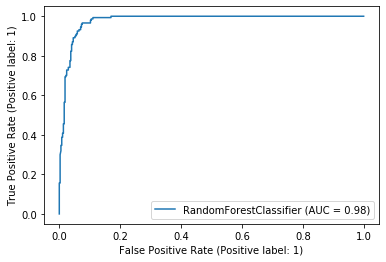

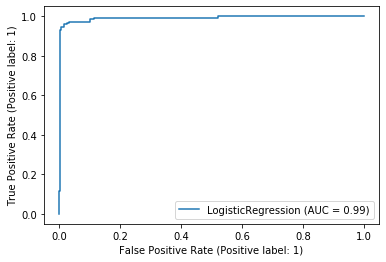

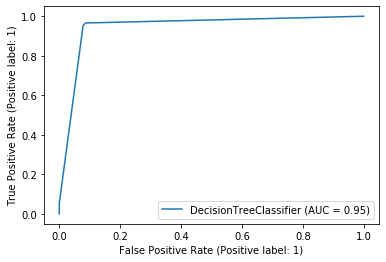

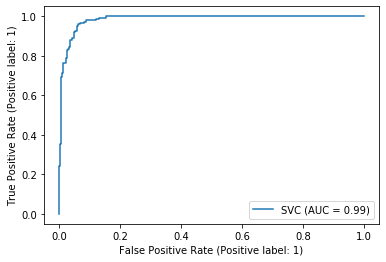

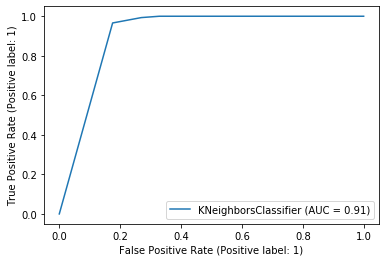

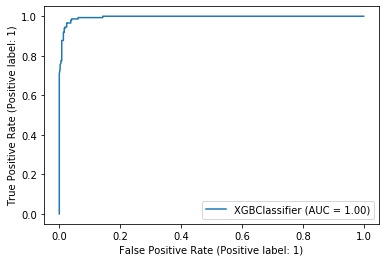

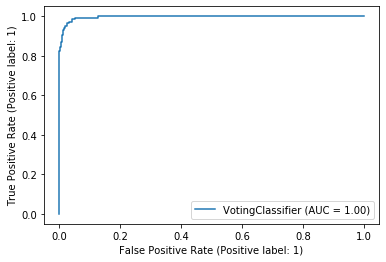

In [19]:
print("Evaluation on the Test set")
eval_model(model,X_test,y_test)

As we can seen from the evaluation the Test Accuracy decrease.